# Canny Edge Detector
$p.30 \sim p.53$

1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/電腦視覺與深度學習/HW1/sample_image')

Mounted at /content/drive


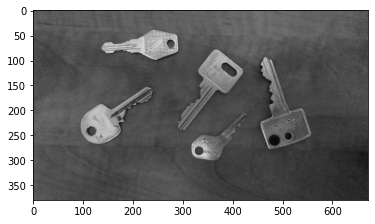

image.shape:  (380, 672)


In [16]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

image = cv2.imread("keys.png",0)
plt.imshow(image ,cmap='gray')
plt.show()
print('image.shape: ', image.shape)

## Step 1. Gaussian filter

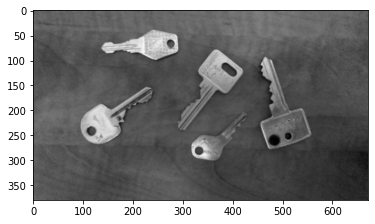

Convolution Finished!


In [3]:
def padding_img(img,k_size,style='edge'):
  # ------------ To do ------------- #
  extra_left, extra_right = k_size, k_size
  extra_top, extra_bottom = k_size, k_size
  new_image = np.pad(img, ((extra_left, extra_right), (extra_top, extra_bottom)), style) 
  return(new_image)

def gaussian_kernel(size):
  # ------------ To do ------------- #
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8   # the height isn't inequal to the width, and both are odds.
  Gaussian = np.zeros((KernelSize, KernelSize))
  constant = 1/(2 * math.pi * sigma**2)
  radium = KernelSize//2
  for i in range(0,KernelSize):
      for j in range(0,KernelSize): 
          #高斯函數公式
          # -------------- To do ----------------- #
          x = i-radium
          y = j-radium
          Gaussian[i][j] = constant*math.exp(-0.5/(sigma**2)*(x**2+y**2))
  #print(Gaussian)
  return np.array(Gaussian)/Gaussian.sum()  

KernelSize = 3
def Gaussian_Filter(KernelSize,image):
  row,col =image.shape
  Gaussian_Kernel = gaussian_kernel(KernelSize)

  resx=np.zeros((row,col),np.int16)
  padimg = padding_img(image,(KernelSize-1)//2,style='reflect')

  # ------------ To do ------------- #
  for i in range(0, row):
    for j in range(0, col):
      resx[i][j] =(padimg[i:i+KernelSize,j:j+KernelSize]*Gaussian_Kernel).sum()
  return resx

resx = Gaussian_Filter(KernelSize, image) # we get a result matrix here.
plt.imshow(resx, cmap = 'gray')
plt.show()
print('Convolution Finished!')

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [5]:
def sobel(img, filtering_type):

  h, w = img.shape

  horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
      
  Gx = np.zeros((h - 2, w - 2))
  Gy = np.zeros((h - 2, w - 2))

  output = np.zeros(img.shape, dtype= 'uint16')
  angle = np.zeros(img.shape, dtype= 'float32')

  # ------------ To do ------------- #
  if(filtering_type == 'horizontal'):
    for i in range(h-2):
      for j in range(w-2):
        Gx[i][j] = (img[i:i + 3, j:j + 3]* horizontal).sum()  # x direction
    output = np.clip(padding_img(Gx,(KernelSize-1)//2), 0, 255)
    return output

  elif(filtering_type == 'vertical'):
    for i in range(h-2):
      for j in range(w-2):
        Gy[i][j] = (img[i:i + 3, j:j + 3]* vertical).sum()  # y direction
    output = np.clip(padding_img(Gy,(KernelSize-1)//2), 0, 255)
    return output

  elif(filtering_type == 'amplitude'):
    for i in range(h-2):
      for j in range(w-2):
        Gx[i][j] = (img[i:i + 3, j:j + 3]* horizontal).sum()  # x direction
        Gy[i][j] = (img[i:i + 3, j:j + 3]* vertical).sum()  # y direction
    output = np.clip(padding_img(np.sqrt(Gx*Gx+Gy*Gy), (KernelSize-1)//2), 0, 255)
    angle = padding_img(np.degrees(np.arctan(Gy/Gx)), (KernelSize-1)//2)
    return output, angle

def iterate_regions(img, kernel_size):
  h, w = img.shape
  for i in range(h - kernel_size + 1):
      for j in range(w - kernel_size + 1):
          img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
          yield img_region, i, j

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


gaussian shape:  (380, 672)
Horizontal Sobel filter shape:  (380, 672)
Vertical Sobel filter shape:  (380, 672)
Gradient amplitude shape:  (380, 672)


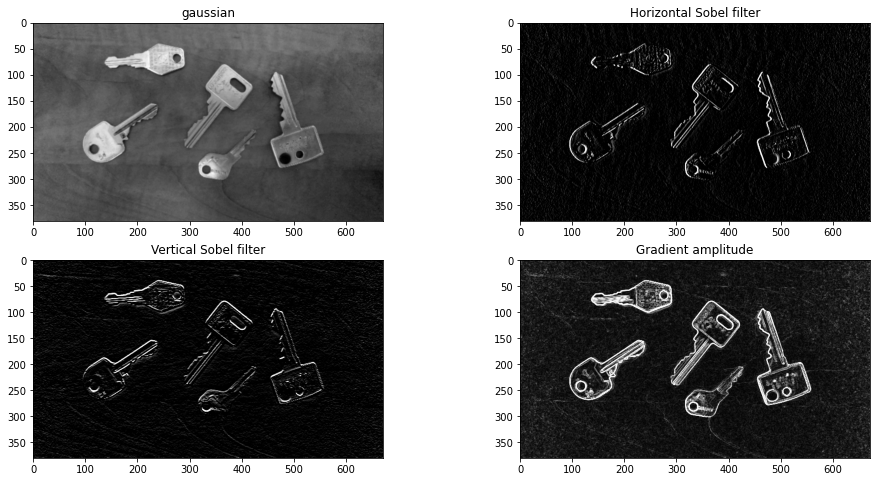

In [7]:
# ------------ To do ------------- #
horizontal= sobel(image, 'horizontal')
vertical = sobel(image, 'vertical')
amplitude, angle = sobel(image, 'amplitude')

print('gaussian shape: ', resx.shape)
print('Horizontal Sobel filter shape: ',horizontal.shape)
print('Vertical Sobel filter shape: ', vertical.shape)
print('Gradient amplitude shape: ', amplitude.shape)

plt.figure(figsize=(16,8))
image = [resx, horizontal, vertical, amplitude]
title = ['gaussian','Horizontal Sobel filter','Vertical Sobel filter','Gradient amplitude']
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title(title[i])
  if i == 0: plt.imshow(image[i], cmap = 'gray')
  else: plt.imshow(image[i], cmap='Greys_r')
plt.show() 

## Step 3. Non-maximum Suppression
Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

In [8]:
def non_maximum_suppression(gradient,angle):
  gradient_copy = gradient.copy()
  height,width= gradient.shape
  for i in range(1, height-1):
      for j in range(1, width-1):
          # ------------ To do ------------- #
        if((angle[i,j] >= -22.5 and angle[i,j] <= 22.5) or (angle[i,j] <= -157.5 and angle[i,j] >= 157.5)):
          if((gradient[i,j] > gradient[i,j+1]) and (gradient[i,j] > gradient[i,j-1])):
              gradient_copy[i,j] = gradient[i,j]
          else:
            gradient_copy[i,j] = 0
        if((angle[i,j] >= 22.5 and angle[i,j] <= 67.5) or (angle[i,j] <= -112.5 and angle[i,j] >= -157.5)):
          if((gradient[i,j] > gradient[i+1,j+1]) and (gradient[i,j] > gradient[i-1,j-1])):
              gradient_copy[i,j] = gradient[i,j]
          else:
              gradient_copy[i,j] = 0
        if((angle[i,j] >= 67.5 and angle[i,j] <= 112.5) or (angle[i,j] <= -67.5 and angle[i,j] >= -112.5)):
          if((gradient[i,j] > gradient[i+1,j]) and (gradient[i,j] > gradient[i-1,j])):
              gradient_copy[i,j] = gradient[i,j]
          else:
              gradient_copy[i,j] = 0
        if((angle[i,j] >= 112.5 and angle[i,j] <= 157.5) or (angle[i,j] <= -22.5 and angle[i,j] >= -67.5)):
          if((gradient[i,j] > gradient[i+1,j-1]) and (gradient[i,j] > gradient[i-1,j+1])):
              gradient_copy[i,j] = gradient[i,j]
          else:
              gradient_copy[i,j] = 0
      
  return gradient_copy

After_non_maximum_supression = non_maximum_suppression(amplitude, angle)

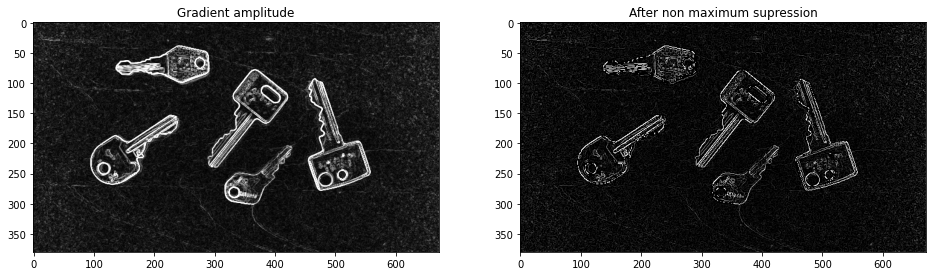

In [9]:
# ------------ To do ------------- #
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Gradient amplitude')
plt.imshow(amplitude, cmap='Greys_r')

plt.subplot(1,2,2)
plt.title('After non maximum supression')
plt.imshow(After_non_maximum_supression, cmap='Greys_r')

plt.show() 

## Step 4. Thresholding edges

In [10]:
def seperate(img, minimum = 60, maximum = 180):
    h,w= img.shape
    GSup = np.copy(img)
    for i in range(1,h-1):
      for j in range(1,w-1):
        if(GSup[i,j] > maximum):
          GSup[i,j] = 1
        elif(GSup[i,j] < minimum):
          GSup[i,j] = 0
        else:
            if((GSup[i-1,j-1] > maximum) or 
                (GSup[i-1,j] > maximum) or
                (GSup[i-1,j+1] > maximum) or
                (GSup[i,j-1] > maximum) or
                (GSup[i,j+1] > maximum) or
                (GSup[i+1,j-1] > maximum) or
                (GSup[i+1,j] > maximum) or
                (GSup[i+1,j+1] > maximum)):
                GSup[i,j] = 1
    GSup = (GSup == 1) * GSup # This is done to remove/clean all the weak edges which are not connected to strong edges
    return GSup

thresholding = seperate(After_non_maximum_supression, minimum = 15, maximum = 90)

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

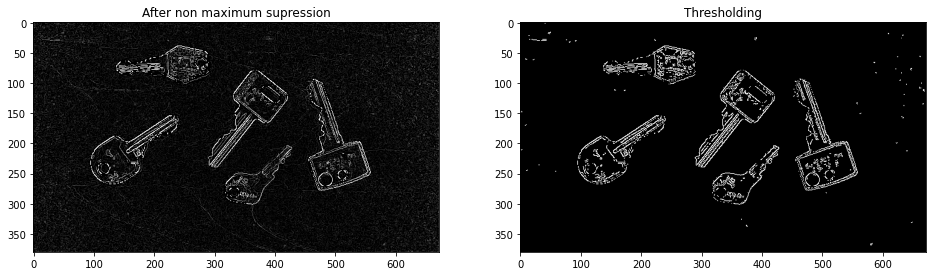

In [11]:
# ------------ To do ------------- #
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('After non maximum supression')
plt.imshow(After_non_maximum_supression, cmap='Greys_r')

plt.subplot(1,2,2)
plt.title('Thresholding')
plt.imshow(thresholding, cmap='Greys_r')

plt.show() 

## Step 5. Hysteresis

In [12]:
def Connect(img, weak=60, strong=255):
  # ------------ To do ------------- #
  M, N = img.shape
  output = img.copy()
  for i in range(1, M-1):
    for j in range(1, N-1):
      if (img[i,j] == weak):
        try:
          if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
            output[i][j] = strong
          else:
            output[i][j] = 0
        except IndexError as e:
          pass
  return output

dst_img = Connect(thresholding, 60)

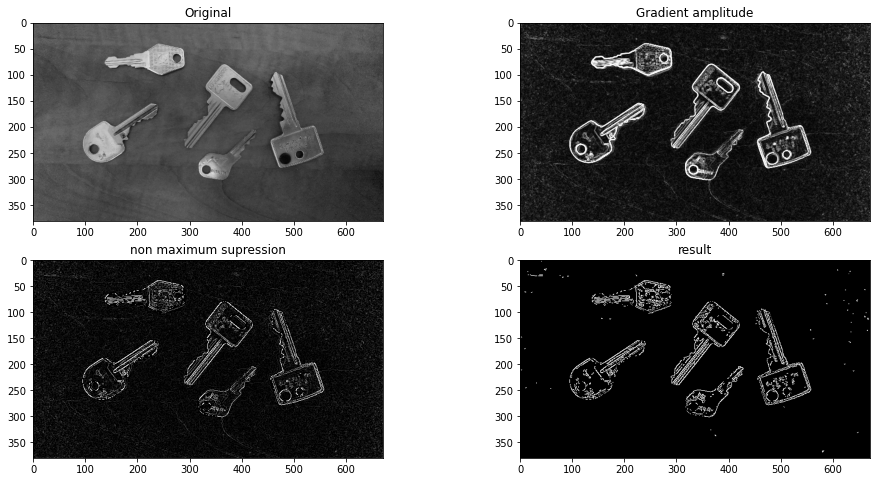

In [17]:
# ------------ To do ------------- #
plt.figure(figsize=(16,8))
img = [image, amplitude, After_non_maximum_supression, dst_img]
title = ['Original','Gradient amplitude','non maximum supression','result']
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title(title[i])
  if i == 0: plt.imshow(img[i], cmap = 'gray')
  else: plt.imshow(img[i], cmap='Greys_r')
plt.show() 

# Canny Edge OpenCV 套件


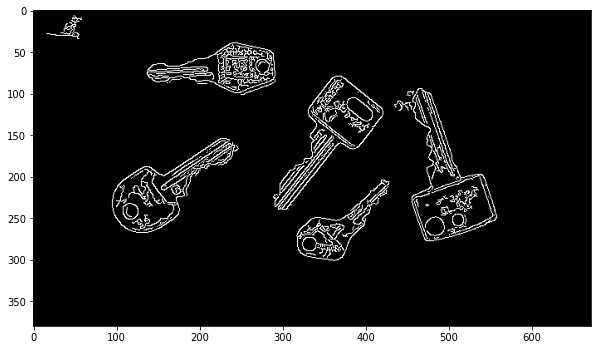

In [ ]:
low_threshold = 15
high_threshold = 90
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
plt.figure(figsize=(10,18))
img2 = cv2.imread("keys.png",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')
plt.show()

# 加分討論：為什麼和套件不一樣？

1. 在 Step 1. 的 Gussian Filter 的 sigma 計算雖然都是 `0.3*((ksize-1)*0.5-1)+0.8`，但在 cv.GaussianBlur() 的處理方式更為繁雜，可利用 ksize.weight 和 ksize.height 各別考量 sigmaX 和 sigmaY。
2. ⚠️在 Step 3. Non-maximum Suppression 直接根據 Angel 大小刪值，但更好的做法是先判斷再用差值，而非第一步就直接刪去，因為這樣很可能刪到曲線本來就比較陡，角度相對比較高的區域。我的就是在這個階段炸掉 XD
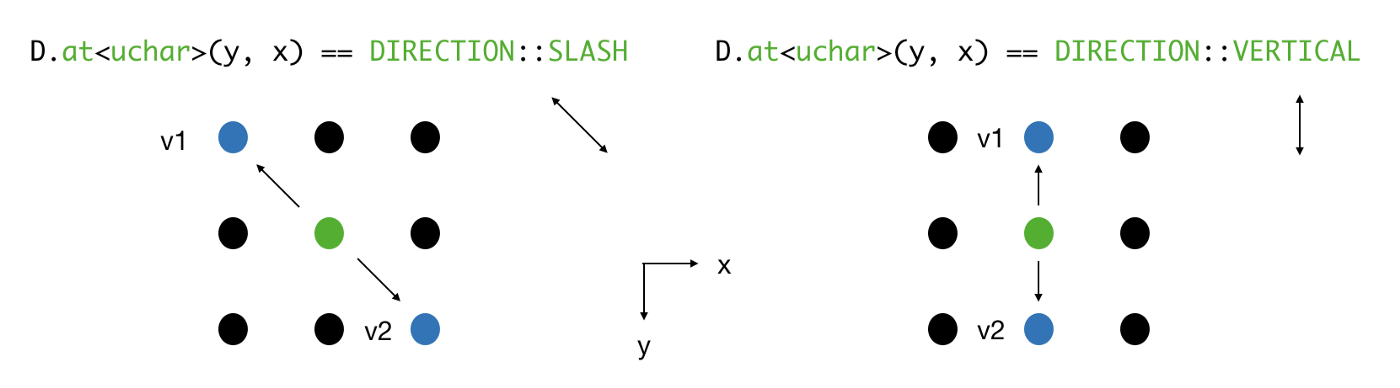
3. 在 cv2.Canny() 的 maxVal 和 minVal 是一條曲線（如下圖）。但作業的 Step 4. Thresholding edges 僅作八方位的大小判斷，很容易誤判刪除真正邊緣。

    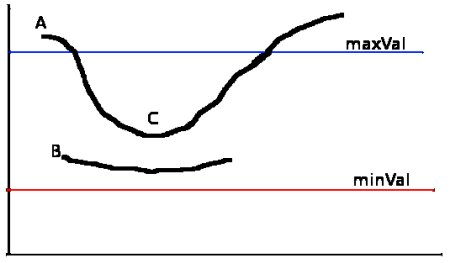

In [ ]:
'''以下為 Non-maximum Suppression 差值計算法
def NonMaxSupWithInterpol(Gmag, Grad, Gx, Gy):
    NMS = np.zeros(Gmag.shape)
    
    for i in range(1, int(Gmag.shape[0]) - 1):
        for j in range(1, int(Gmag.shape[1]) - 1):
            if((Grad[i,j] >= 0 and Grad[i,j] <= 45) or (Grad[i,j] < -135 and Grad[i,j] >= -180)):
                yBot = np.array([Gmag[i,j+1], Gmag[i+1,j+1]])
                yTop = np.array([Gmag[i,j-1], Gmag[i-1,j-1]])
                x_est = np.absolute(Gy[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                      NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] > 45 and Grad[i,j] <= 90) or (Grad[i,j] < -90 and Grad[i,j] >= -135)):
                yBot = np.array([Gmag[i+1,j] ,Gmag[i+1,j+1]])
                yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j-1]])
                x_est = np.absolute(Gx[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NMS[i,j] =Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] > 90 and Grad[i,j] <= 135) or (Grad[i,j] < -45 and Grad[i,j] >= -90)):
                yBot = np.array([Gmag[i+1,j] ,Gmag[i+1,j-1]])
                yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j+1]])
                x_est = np.absolute(Gx[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NMS[i,j] =Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] > 135 and Grad[i,j] <= 180) or (Grad[i,j] < 0 and Grad[i,j] >= -45)):
                yBot = np.array([Gmag[i,j-1] ,Gmag[i+1,j-1]])
                yTop = np.array([Gmag[i,j+1] ,Gmag[i-1,j+1]])
                x_est = np.absolute(Gy[i,j]/Gmag[i,j])
                if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
                    NMS[i,j] =Gmag[i,j]
                else:
                    NMS[i,j] = 0
    
    return NMS
'''